In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import random

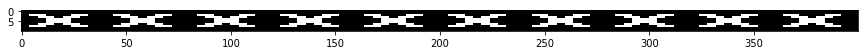

In [2]:
def draw_crosses(h, w):
    A = np.zeros((h, w))
    for i, row in enumerate(A):
        for j, cell in enumerate(row):
            # crosses
            if  -2 < ((j // 4) % (A.shape[0]) - i) < 1 and 1 < i < A.shape[0] - 2:
                A[i, j] = 1       
            if  0 < (A.shape[0] - ((j // 4) % (A.shape[0]) + i)) < 3 and 1 < i < A.shape[0] - 2:
                A[i, j] = 1

            # circles
            # if (i - A.shape[0] / 2) ** 2 + ((j//4) % (A.shape[0]) - A.shape[0] / 2) ** 2 < .2 * (A.shape[0] ** 2):
            #     A[i, j] = 1
    return A

A = draw_crosses(10, 400)
plt.figure(figsize=(15,10))
plt.imshow(A, cmap="gray")
plt.show()

In [3]:
class Context:
    def __init__(self, width, row=0):
        self.DSU = dict()
        self.last = [None] * width
        self.width = width
        self.row = row
    
    def eat(self, item):
        # print("Bounding box ready:", item.get_bbox())
        item.dead = True
        t, r, b, l = item.get_bbox()
        A[r, t:b+1] = 2
        A[l, t:b+1] = 2
        A[l:r+1, t] = 2
        A[l:r+1, b] = 2
    
    def reset(self):
        for k, v in self.DSU.items():
            v.touched = False
    
    def swallow(self):
        for k, v in self.DSU.items():
            # process untouched roots - print, draw and remove
            if not v.touched and k == v.id(): self.eat(v)

        to_remove = set(k for k, v in self.DSU.items() if v.find().dead)                
        for k in to_remove: del self.DSU[k]                
    
class Node:
    def __init__(self, col, weight, context):
        self.context = context
        self.row = context.row
        self.col = col
        self.weight = weight
        
        self.touched = True
        self.dead = False
        
        self.top = self.row
        self.bottom = self.row
        self.left = self.col
        self.right = self.col

        self.context.DSU[self.id()] = self
    
    def parent(self):
        return self.context.DSU[self.id()]
    
    def find(self, origin=None):
        if origin is None: origin = self
        self.touched = True    
        self.top = min(origin.top, self.top)
        self.bottom = max(origin.bottom, self.bottom)
        self.left = min(origin.left, self.left)
        self.right = max(origin.right, self.right)
        if self.id() != self.parent().id():
            self.context.DSU[self.id()] = self.parent().find(origin)
        return self.context.DSU[self.id()]

    def union(self, other):
        i, j = self.find(), other.find()
        if i.id() != j.id():
            self.context.DSU[i.id()] = j
            # update sizes
            self.find(other)
            other.find(self)

    def connected(self, other):
        return self.find().id() == other.find().id()

    def id(self):
        return self.row * self.context.width + self.col
    
    def get_bbox(self):
        return [self.top, self.right, self.bottom, self.left]
            
    def __str__(self):
        return "[{}-{}, {}-{}][{}{}]".format(
                    self.top, self.bottom, self.left, self.right, 
                    "+" if self.dead else " ", 
                    "T" if self.touched else " ")
    
    def __repr__(self):
        return str(self)

In [4]:
def connect(node, neighbours, context):
    for neighbour in neighbours:
        if neighbour is not None:
            node.union(neighbour)
    
def process(line, context):
    assert context.width == len(line), "Line size don't match"
    context.reset()
    r = [None] * context.width
    for col in range(context.width):
        if line[col] > 0:
            r[col] = Node(col, line[col], context)
            connectivity = [context.last[col]] if i == 0 else [context.last[col], r[col-1]]
            connect(r[col], connectivity, context)
    context.last = r
    context.row += 1

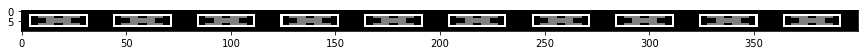

In [5]:
context = Context(A.shape[0])

for i in range(A.shape[1]):
    process(A[:, i], context)
    context.swallow()
    
process([0] * A.shape[0], context)
context.swallow()
    
plt.figure(figsize=(15,10))
plt.imshow(A, cmap="gray")
plt.show()

4 / 81 | 8 / 81 | 12 / 81 | 16 / 81 | 20 / 81 | 24 / 81 | 28 / 81 | 32 / 81 | 36 / 81 | 40 / 81 | 44 / 81 | 48 / 81 | 52 / 81 | 56 / 81 | 60 / 81 | 64 / 81 | 68 / 81 | 72 / 81 | 76 / 81 | 80 / 81 | 4 / 81 | 8 / 81 | 12 / 81 | 16 / 81 | 20 / 81 | 24 / 81 | 28 / 81 | 32 / 81 | 36 / 81 | 40 / 81 | 44 / 81 | 48 / 81 | 52 / 81 | 56 / 81 | 60 / 81 | 64 / 81 | 68 / 81 | 72 / 81 | 76 / 81 | 80 / 81 | 4 / 81 | 8 / 81 | 12 / 81 | 16 / 81 | 20 / 81 | 24 / 81 | 28 / 81 | 32 / 81 | 36 / 81 | 40 / 81 | 44 / 81 | 48 / 81 | 52 / 81 | 56 / 81 | 60 / 81 | 64 / 81 | 68 / 81 | 72 / 81 | 76 / 81 | 80 / 81 | 

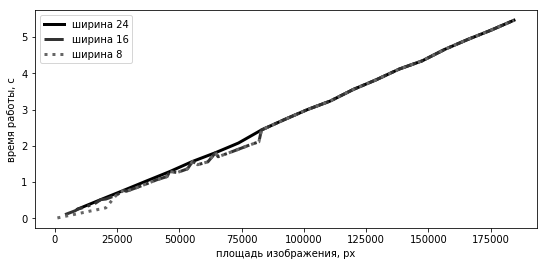

In [9]:
#  Cross test
repetitions = 5

def fillA(W, times):
    return draw_crosses(W, W * 4 * times)

result = {}
maxtimes = 81

plt.figure(figsize=(9,4))

widths = {24: '-', 16: '-.', 8: ':'}
colors = {24: 'black', 16: '#333333', 8: '#666666'}

for W, style in widths.items():
    for times in range(4, maxtimes, 4):
        durations = []
        AA = fillA(W, times)
        for rep in range(repetitions):
            A = AA.copy() 
            context = Context(A.shape[0])

            start = time.perf_counter()

            for j in range(A.shape[1]):
                process(A[:, j], context)
                context.swallow()    
            context.swallow()

            finish = time.perf_counter()

            durations.append(finish - start)

        result[A.shape[0] * A.shape[1]] = min(durations)
        print(times, "/", maxtimes, end=" | ")

    cross_test_results = sorted(result.items()) # sorted by key, return a list of tuples
    x, y = zip(*cross_test_results) # unpack a list of pairs into two tuples

    plt.xlabel("площадь изображения, px")
    plt.ylabel("время работы, с")
    plt.plot(x, y, color=colors[W], linewidth=3, linestyle=style, label="ширина {}".format(W))


plt.legend()
plt.show()

4 / 101 | 8 / 101 | 12 / 101 | 16 / 101 | 20 / 101 | 24 / 101 | 28 / 101 | 32 / 101 | 36 / 101 | 40 / 101 | 44 / 101 | 48 / 101 | 52 / 101 | 56 / 101 | 60 / 101 | 64 / 101 | 68 / 101 | 72 / 101 | 76 / 101 | 80 / 101 | 84 / 101 | 88 / 101 | 92 / 101 | 96 / 101 | 100 / 101 | 

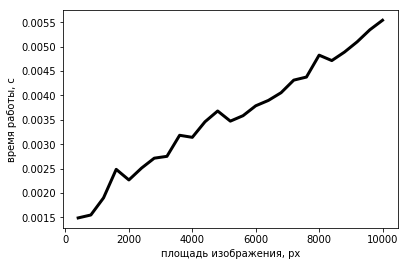

In [10]:
# Noise test
W = 10
repetitions = 50
retries = 3

def fillA_random(W, times, thr):
    A = np.zeros((W, W * times))
    for i in range(A.shape[0]):
        for j in range(W):
            A[i, j] = (random.random() < thr) * 1
    return A

result = {}
maxtimes = 101

for times in range(4, maxtimes, 4):
    for rep in range(repetitions):
        A = fillA_random(W, times, (rep + repetitions) / 3.0 / repetitions)
        durations = []
        for i in range(retries):
            context = Context(A.shape[0])
            start = time.perf_counter()
            for i in range(A.shape[1]):
                process(A[:, i], context)
                context.swallow()    
            context.swallow()
            finish = time.perf_counter()
            durations.append(finish - start)
        if A.shape[0] * A.shape[1] not in result:
            result[A.shape[0] * A.shape[1]] = []
        result[A.shape[0] * A.shape[1]].append(min(durations))
    print(times, "/", maxtimes, end=" | ")
    
lists = sorted([(k, sum(v) / repetitions) for k, v in result.items()]) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.xlabel("площадь изображения, px")
plt.ylabel("время работы, с")
plt.plot(x, y, color='black', linewidth=3)
plt.show()